# <p style="text-align: center;">EDA FOR COUNTRIES OF THE WORLD</p>


In [1]:
from IPython.display import HTML
from IPython.display import Image
Image(url= "https://www.worldatlas.com/r/w728-h425-c728x425/upload/0f/59/b2/untitled-design-275.jpg")

# <p style="text-align: center;">ABSTRACT</p>
[Reference Link 1](#1)

Countries of the World is a dataset by Fernando Lasso, which has a list of various factors which affect the GDP per capita of the countries. In this Notebook, I have shown the factors which highly affect the GDP per capita and some factors which more or less do not affect the GDP per capita. I have also discussed about the GDP which is GDP per capita multiplied by the total population of the country. Linear Regression and Correlation are the Exploratory Data Analysis methods used to find the factors affecting the GDP. A few factors that affect the GDP of a Country are Phones owned by people per Thousand, Birthrate of a country and Literacy rate of the country etc.


In [2]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [4]:
# read csv file
df=pd.read_csv("countries of the world.csv", decimal = ',')

### Dataset Overview
Here we are looking at the top 5 rows of the dataset to view, what type of dataset it is. We also look at the columns which show the various attributes in the dataset.

In [5]:
# View first 5 rows(default) to see the general distribution of data
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Statistical Analysis
Here we are running basic Statistical analysis on the given data to find any abnormal values in the dataset

In [6]:
# run basic statistical analysis on the given data to find any abnormal values
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Checking for empty fields
[Reference Link 2](#2)

Next we will check if there are any missing or Null values in the dataset.

In [7]:
print("Are there Null Values in the dataset? ")
df.isnull().values.any()

Are there Null Values in the dataset? 


True

### Finding the location of Null values
[Reference Link 2](#2)

Now that we know that there are missing(null) values in the dataset, we need to find the columns which have missing values and then find the percentage of how much data is missing in those columns to get a better picture.

In [8]:
# finding the missing or null values in the data
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])

,Total Missing,Percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


### How to find the missing values in the dataset?
[Reference Link 2](#2)

Now that we know that there are missing values in the dataset, we need a remedy to this. We could either ignore the missing values if the number of missing values is low, but in some cases like climate and literacy there are many missing values (about 10%) of the data,this could significantly affect the graph. So before we run our analysis, we need to figure out a way to replace these null values. Below we are plotting our dependant variable (GDP per capita) to find out its distribution. Based on this distribution, we will be able to decide how to replace our missing values.

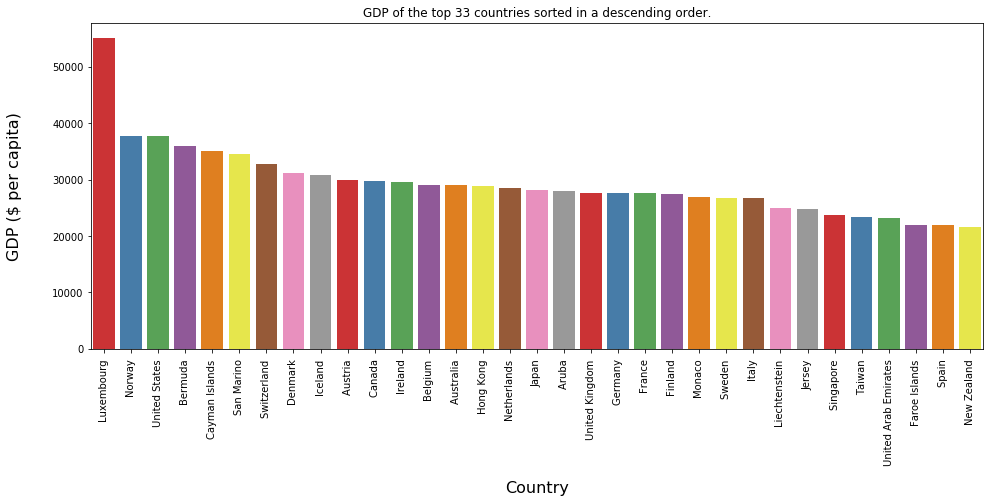

In [9]:
# sorting and plotting Countries based on GDP
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
ax.set_title('GDP of the top 33 countries sorted in a descending order.')
plt.xticks(rotation=90)
plt.show()

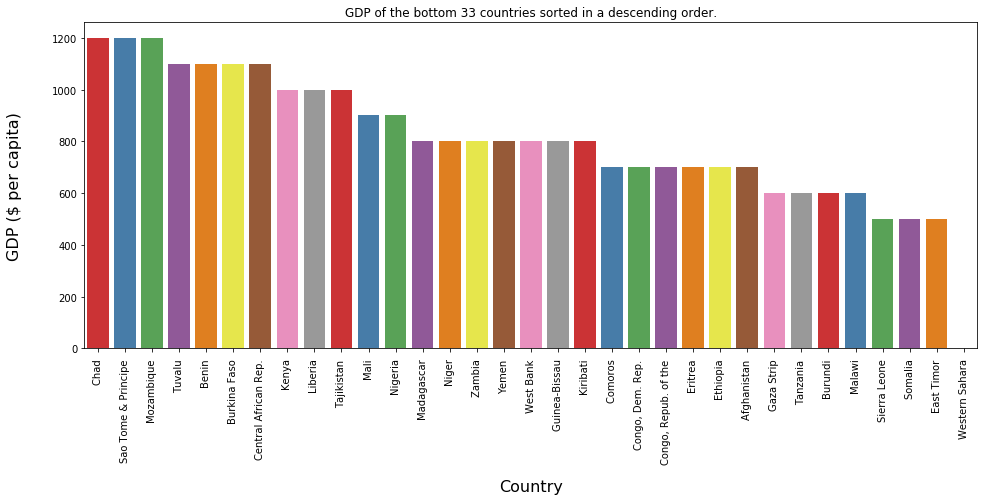

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
ax.set_title('GDP of the bottom 33 countries sorted in a descending order.')
plt.xticks(rotation=90)
plt.show()

### Replacing missing values in the dataset
[Reference Link 2](#2)

From the graphs plotted above, we can see that the GDP per capita is distributed in a skewed manner i.e. it starts with a high value and then exponentially drops to a low value. Since the distribution is skewed, it is advisable to replace the missing values with the central tendancy of median. We do not use mean or mode because mean is influenced by outliers while mode can have multiple values and mode is generally used for categorical data.

A region is an area of land that includes a number of places which have something in common. It is generally seen, that countries in the same region have the same climate, and thus agricultural patterns are similar. Other socio-cultural attributes such as literacy, industry etc are also found to be similar in a region.

Thus we are grouping our data by the region and calculating the median of the values of each attributes. Now these median values can be used to replace the missing values in our data set. Below I have shown the median values of GDP, Literacy % and Agriculture grouped by region.(I have randomly selected Literacy and Agriculture to show the grouping by region)

PS- Since climate is a categorical data, we are using mode instead of mean for climate.

In [11]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [12]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

C:\Users\Rushabh\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
print("Are there Null Values in the dataset? ")
df.isnull().values.any()

Are there Null Values in the dataset? 


False

In [14]:
print(df.isnull().sum())

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


### No missing values
As we can see, that the missing values in the dataset are now gone, we can actually begin with our Exploratory data analysis. EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis.

# <p style="text-align: center;"> Correlation<p>
[Reference Link 1](#1)
    
In the first step of our EDA we are finding out the correlation among the various attributes of the dataset. Correlation value gives us the measure of linear relationship amongst two numerical quantities. The range of correlation is between -1 and 1.

When two variables have a positive correlation, it means the variables move in the same direction. This means that as one variable increases, so does the other one. In a negative correlation, the variables move in inverse, or opposite, directions. In other words, as one variable increases, the other variable decreases. When the correlation value is 0, no correlation exists between the attributes

In this case, it will give us the attributes which are most related to GDP per capita. And thus these attributes will help us analyze the factors which affect the GDP per capita in a country

In [15]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000122,0.024488,-0.038915,-0.051610,-0.029235,0.188337,-0.059617,-0.121118,-0.024329,-0.044151,-0.025974,0.004867,0.105732,-0.087356
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047537,-0.005120,0.072460,0.025954,0.055026,-0.079270,-0.142234,0.137956,0.031986,-0.064822,0.042418,-0.048821,0.127401,-0.057227
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178088,-0.142741,0.196063,0.098487,0.280818,-0.080857,-0.032460,0.082066,0.061828,-0.157909,-0.067910,-0.110235,-0.116734,0.229223
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.133947,-0.138223,0.049561,0.133112,0.153204,-0.120760,0.338889,-0.078312,-0.006490,-0.074021,-0.162705,-0.036301,-0.214819,0.210201
Net migration,0.000122,0.047537,0.178088,-0.133947,1.000000,-0.024876,0.382029,-0.015620,0.239160,-0.059334,-0.344337,0.225740,0.027798,-0.064947,0.033575,-0.107105,-0.019156,0.110103
Infant mortality (per 1000 births),0.024488,-0.005120,-0.142741,-0.138223,-0.024876,1.000000,-0.595432,-0.758702,-0.666699,-0.113607,-0.070197,0.128063,-0.373921,0.844442,0.655891,0.706734,0.028859,-0.640007
GDP ($ per capita),-0.038915,0.072460,0.196063,0.049561,0.382029,-0.595432,1.000000,0.508839,0.832364,0.023937,-0.218093,0.093737,0.361704,-0.643199,-0.196322,-0.585987,-0.034993,0.553994
Literacy (%),-0.051610,0.025954,0.098487,0.133112,-0.015620,-0.758702,0.508839,1.000000,0.587440,0.085269,0.038372,-0.088522,0.425807,-0.776946,-0.376756,-0.594062,0.019528,0.505618
Phones (per 1000),-0.029235,0.055026,0.280818,0.153204,0.239160,-0.666699,0.832364,0.587440,1.000000,0.068853,-0.150700,0.022293,0.436692,-0.721099,-0.253033,-0.599405,-0.158178,0.670933
Arable (%),0.188337,-0.079270,-0.080857,-0.120760,-0.059334,-0.113607,0.023937,0.085269,0.068853,1.000000,0.094614,-0.856770,0.377806,-0.195100,0.060153,-0.023227,-0.048444,0.066550


### Heatmap
Below is a Heatmap, which is a visualization of the correlation

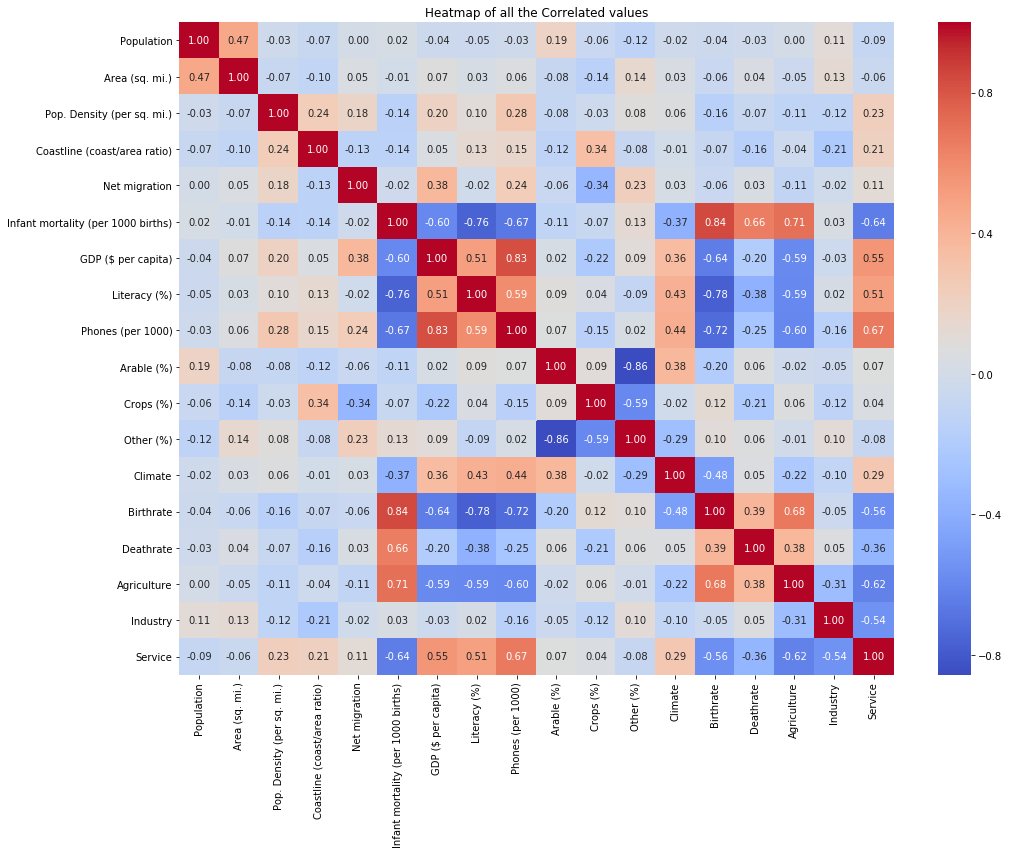

In [16]:
plt.figure(figsize=(16,12))
ax=plt.axes()
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the Correlated values')
plt.show()

### Heatmap for Higly Correlated Values
As we can see from the Upper Heatmap, attributes such as Literacy, Phones per thousand and Service are highly positively correlated with GDP per capita whereas Infant Mortality Rate, Birthrate and Agriculture are highly negatively correlated with GDP per capita.
This means that if GDP per Capita would increase then likely Phones per thousand will also increase and vice versa.
And, if GDP per Capita would increase then likely the infant Mortality rate would go down and vice versa.

In [17]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Agriculture']]

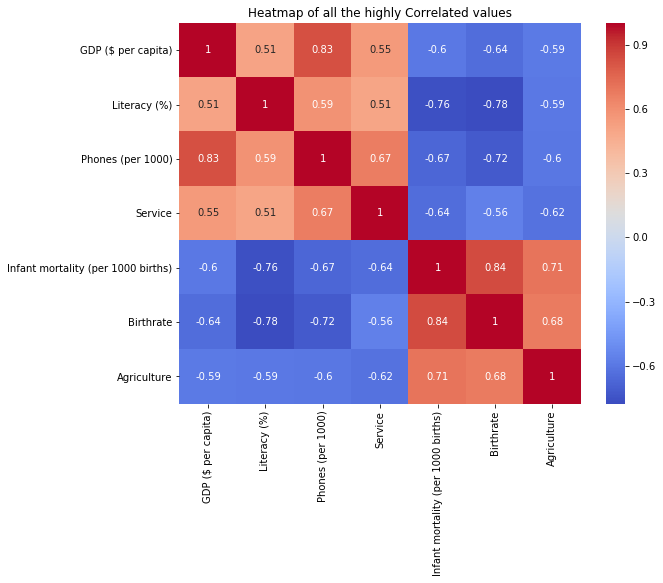

In [18]:
# show corr of the same
plt.figure(figsize=(9,7))
ax=plt.axes()
sns.heatmap(x.corr(), annot=True, cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the highly Correlated values')
plt.show()

### Scatterplot
[Reference Link 1](#1)

Scatterplot is a graph of plotted points that show the relationship between two sets of data. It helps us find the linear relationship between dependant and independant variable (x vs y),which is (Factors vs GDP per capita) in this case. It basically shows how strongly two variables have linear relationship. 

Since we have some factors which are inversely correlated with GDP per capita , we are going to take the absolute value of correlation coefficient and plot it.

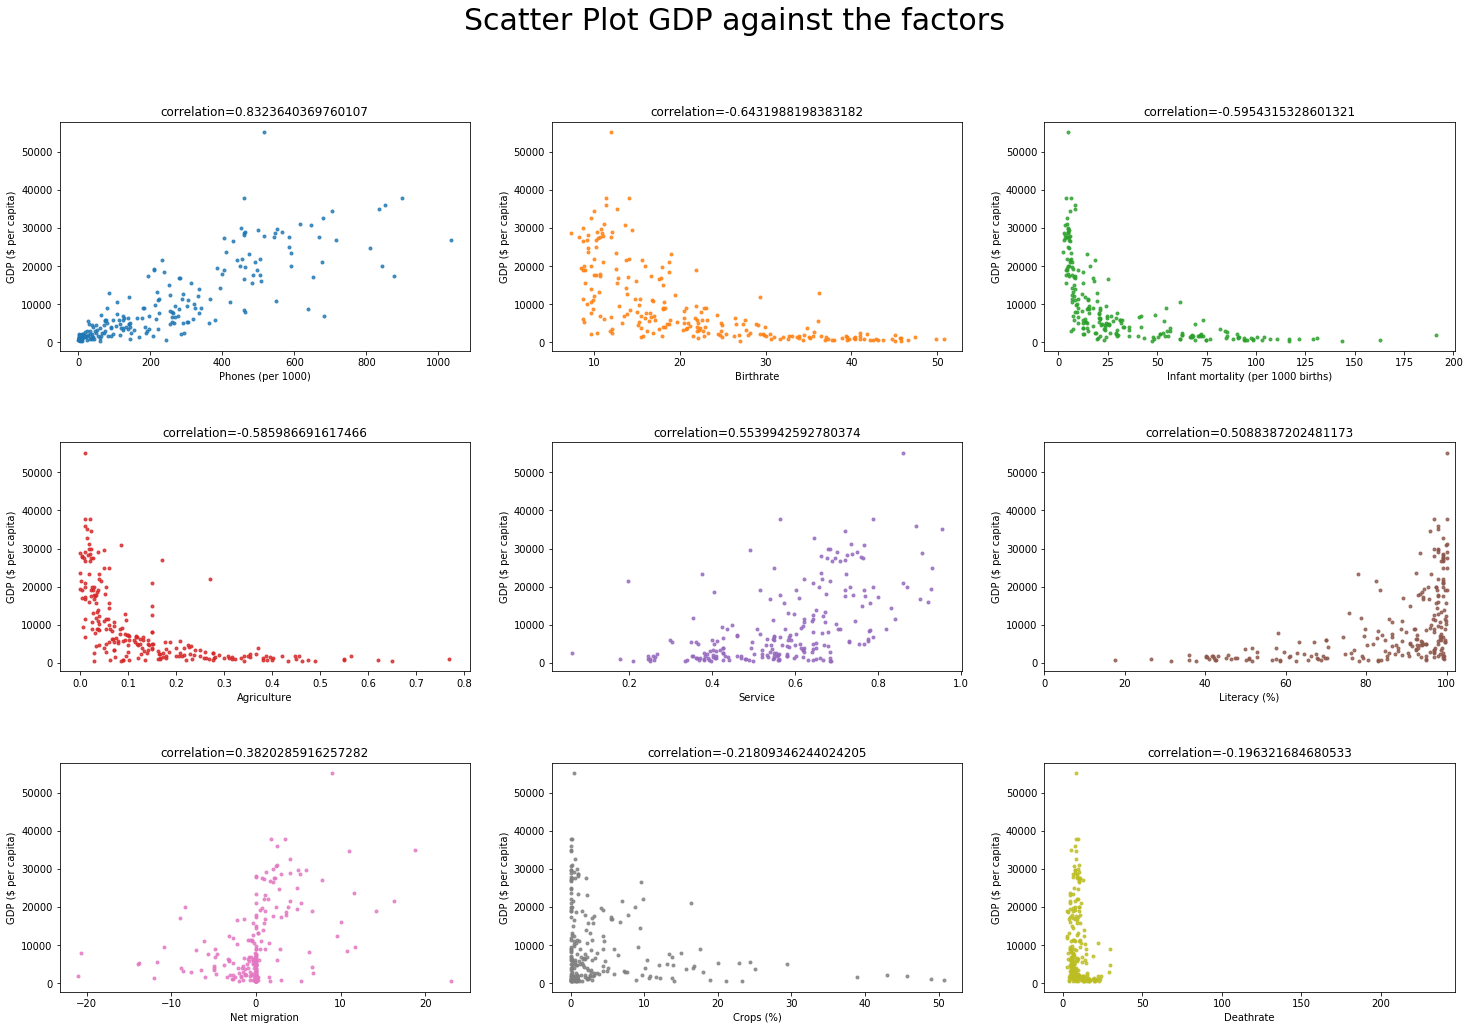

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,16))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')&(col!='Coastline (coast/area ratio)')&(col!='Pop. Density (per sq. mi.)')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
fig.suptitle('Scatter Plot GDP against the factors',fontsize=30)
plt.show()

### Pairplot

[Reference Link 1](#1)

While there are an almost overwhelming number of methods to use in EDA, one of the most effective starting tools is the pairs plot (also called a scatterplot matrix). A pairs plot allows us to see both distribution of single variables and relationships between two variables(Here GDP, Phones per thousand and Region). Pair plots are a great method to identify trends for follow-up analysis.

The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

Text(0.5, 1.05, 'Scatter Plot of GDP, Phones per Thousand and Service')

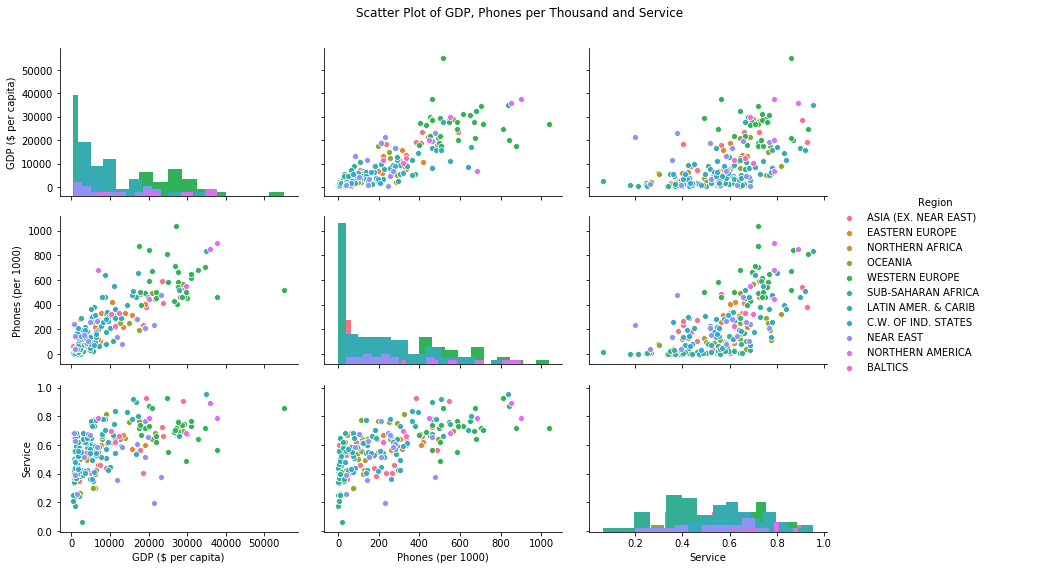

In [20]:
x = df[['GDP ($ per capita)','Phones (per 1000)','Service', 'Region']]
pp=sns.pairplot(x, hue="Region", diag_kind="hist", aspect=1.55, markers="o")
pp.fig.suptitle('Scatter Plot of GDP, Phones per Thousand and Service',y=1.05)

### Distplot
#### Positively Correlated Factors
[Reference Link 1](#1)

The following figure gives a plot for density of positively correlated factors (where r>0). And it is a univariate distribution

C:\Users\Rushabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


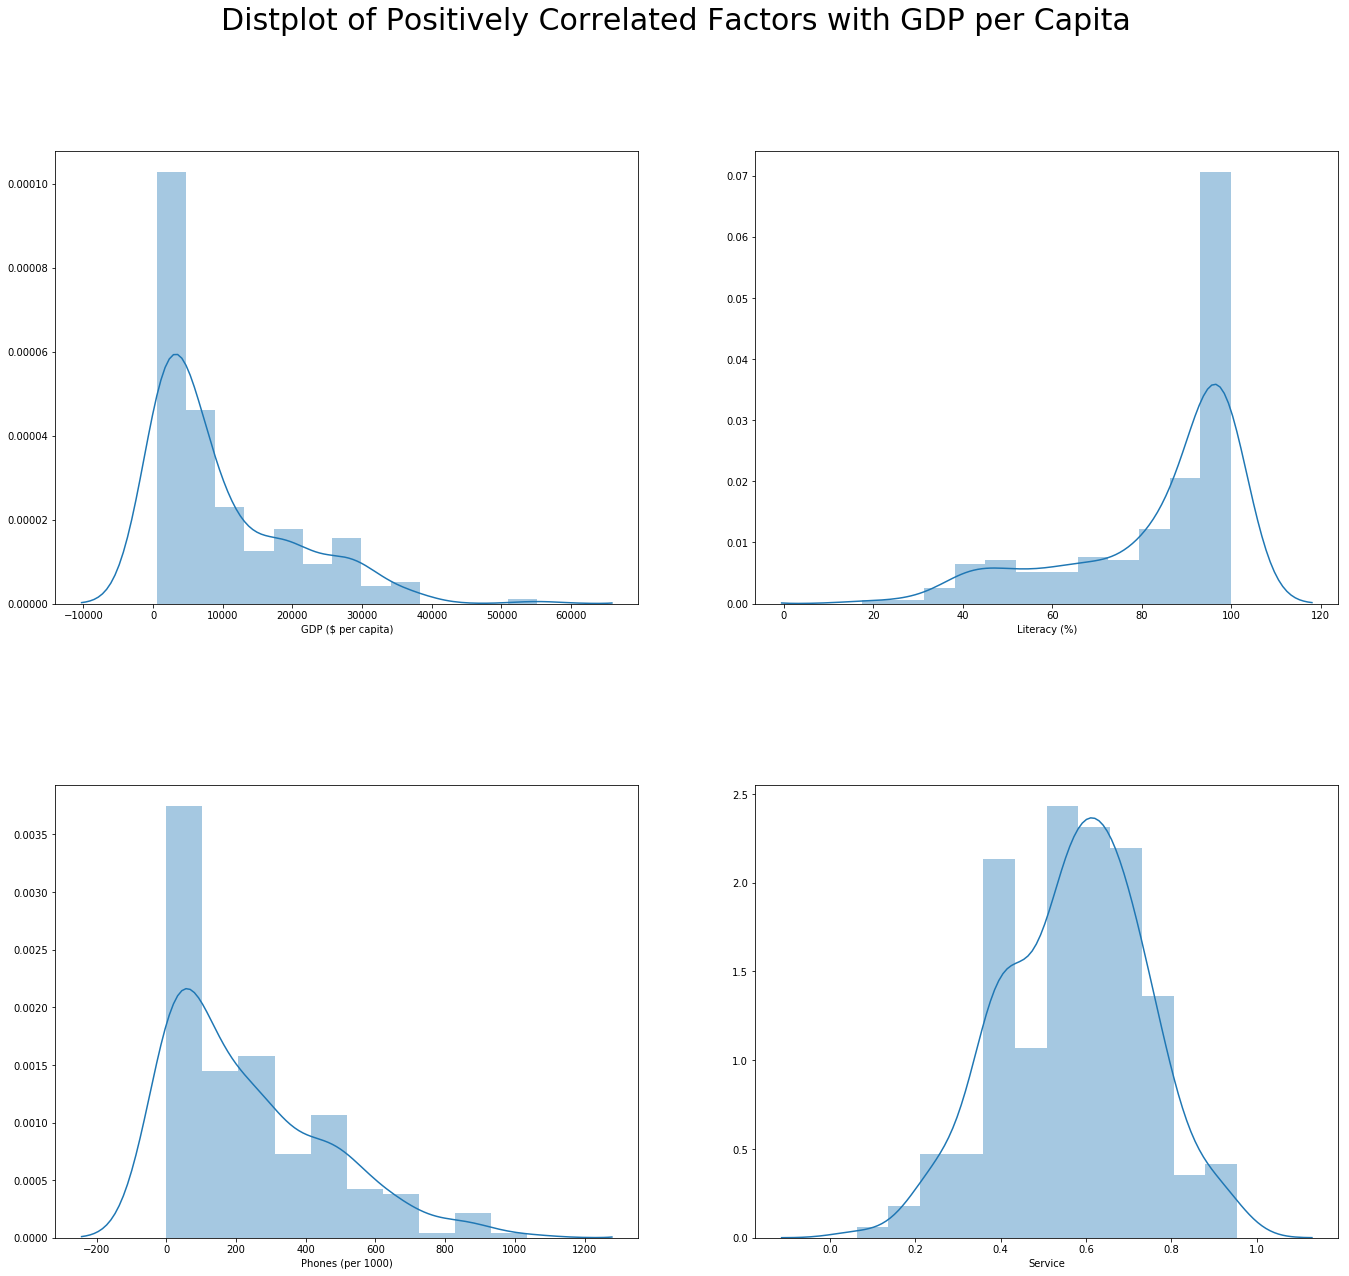

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(23,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='Deathrate')&(col!='Net migration')&(col!='Industry')&(col!='Agriculture')&(col!='Birthrate')&(col!='Area (sq. mi.)')&(col!='Population')&(col!='Other (%)')&(col!='Crops (%)')&(col!='Arable (%)')&(col!='Infant mortality (per 1000 births)')&(col!='Climate')&(col!='Coastline (coast/area ratio)') &(col!='Pop. Density (per sq. mi.)')):
    # if ((col=='GDP ($ per capita)')&(col=='Literacy (%)')&(col=='Service')&(col=='Phones (per 1000)')):
        colums=np.array(df[col])
        z[col]=colums
for i in range(2):
    for j in range(2):
        
        x=z[i*2+j]
        y=z.index[i*2+j]
        sns.distplot(x,axlabel=y,ax=axes[i,j])
        
fig.suptitle('Distplot of Positively Correlated Factors with GDP per Capita',fontsize=30)        
plt.show()

#### Negatively Correlated Factors
The following figure gives a plot for density of negatively correlated factors (where r<0). And it is a univariate distribution

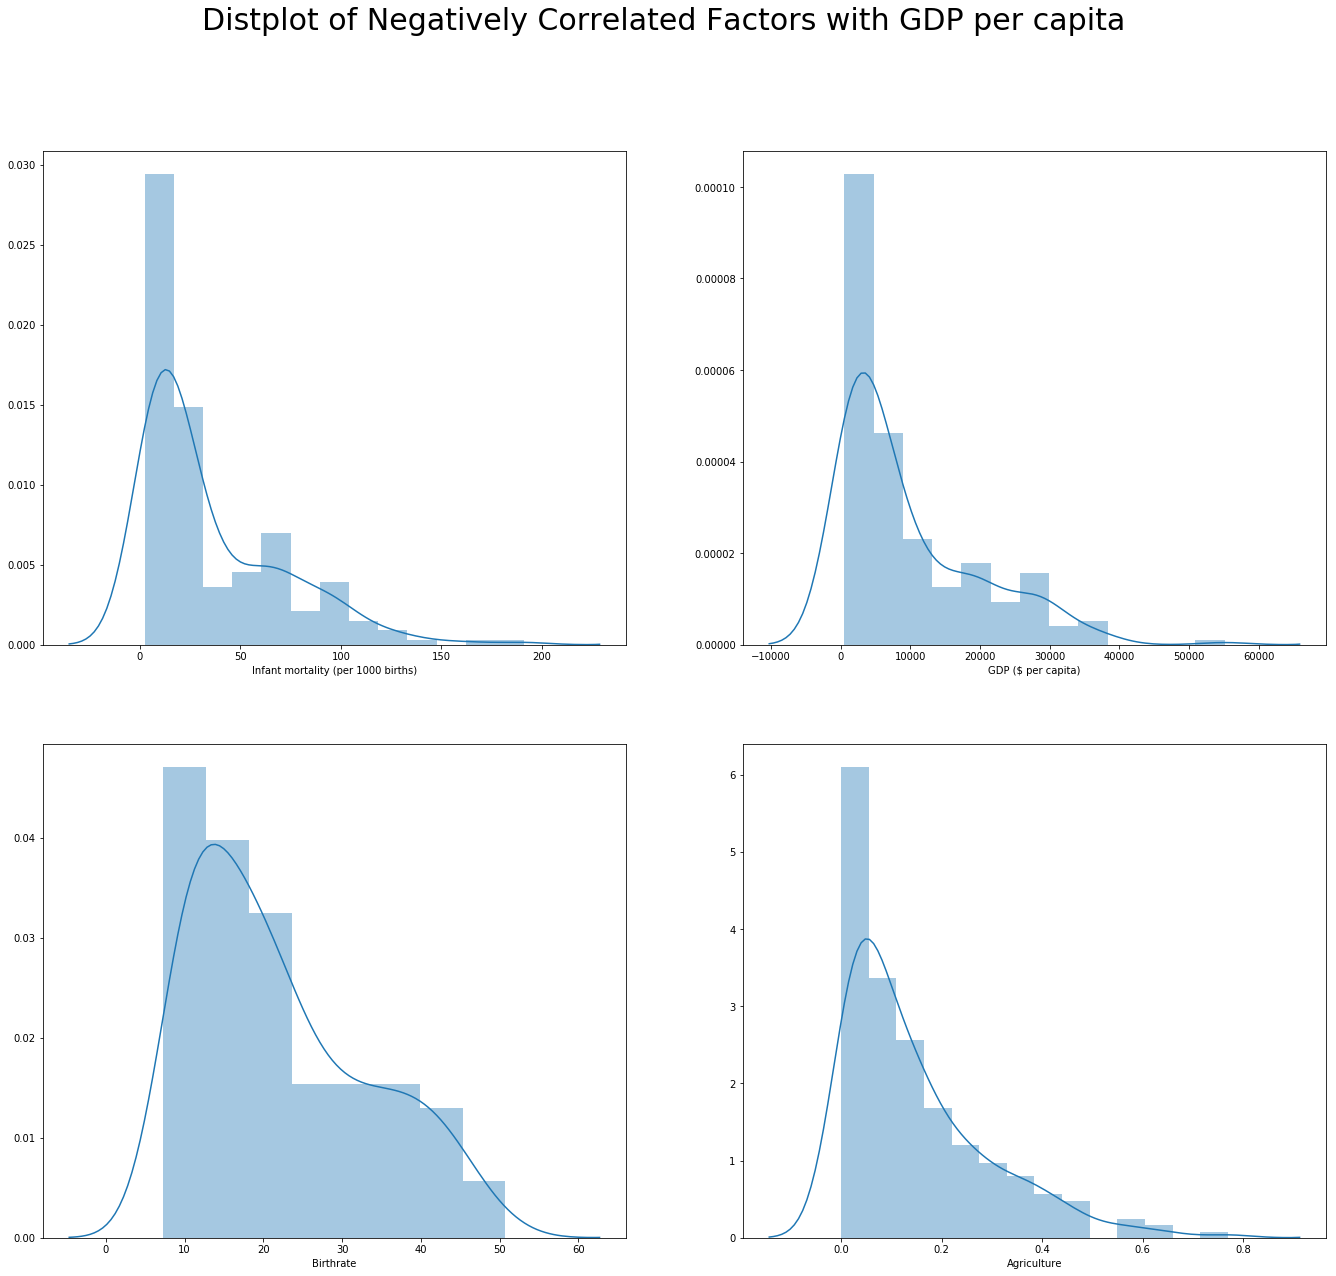

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(23,20))
plt.subplots_adjust(hspace=0.2)

z = pd.Series()
for col in df.columns.values[2:]:
     if ((col!='Service')&(col!='Deathrate')&(col!='Net migration')&(col!='Industry')&(col!='Literacy (%)')&(col!='Area (sq. mi.)')&(col!='Population')&(col!='Other (%)')&(col!='Crops (%)')&(col!='Arable (%)')&(col!='Phones (per 1000)')&(col!='Climate')&(col!='Coastline (coast/area ratio)') &(col!='Pop. Density (per sq. mi.)')):
            
        colums=np.array(df[col])
        z[col]=colums
        
for i in range(2):
    for j in range(2):
        
        x=z[i*2+j]
        y=z.index[i*2+j]
        sns.distplot(x,axlabel=y,ax=axes[i,j])
      
fig.suptitle('Distplot of Negatively Correlated Factors with GDP per capita',fontsize=30)                
plt.show()

### Boxplot
[Reference Link 1](#1)

It is often used in explanatory data analysis in order to show the shape of the distribution, its central value, and its variability. The following figure gives us the boxplot for the first three factors that are highly positively and negatively correlated.

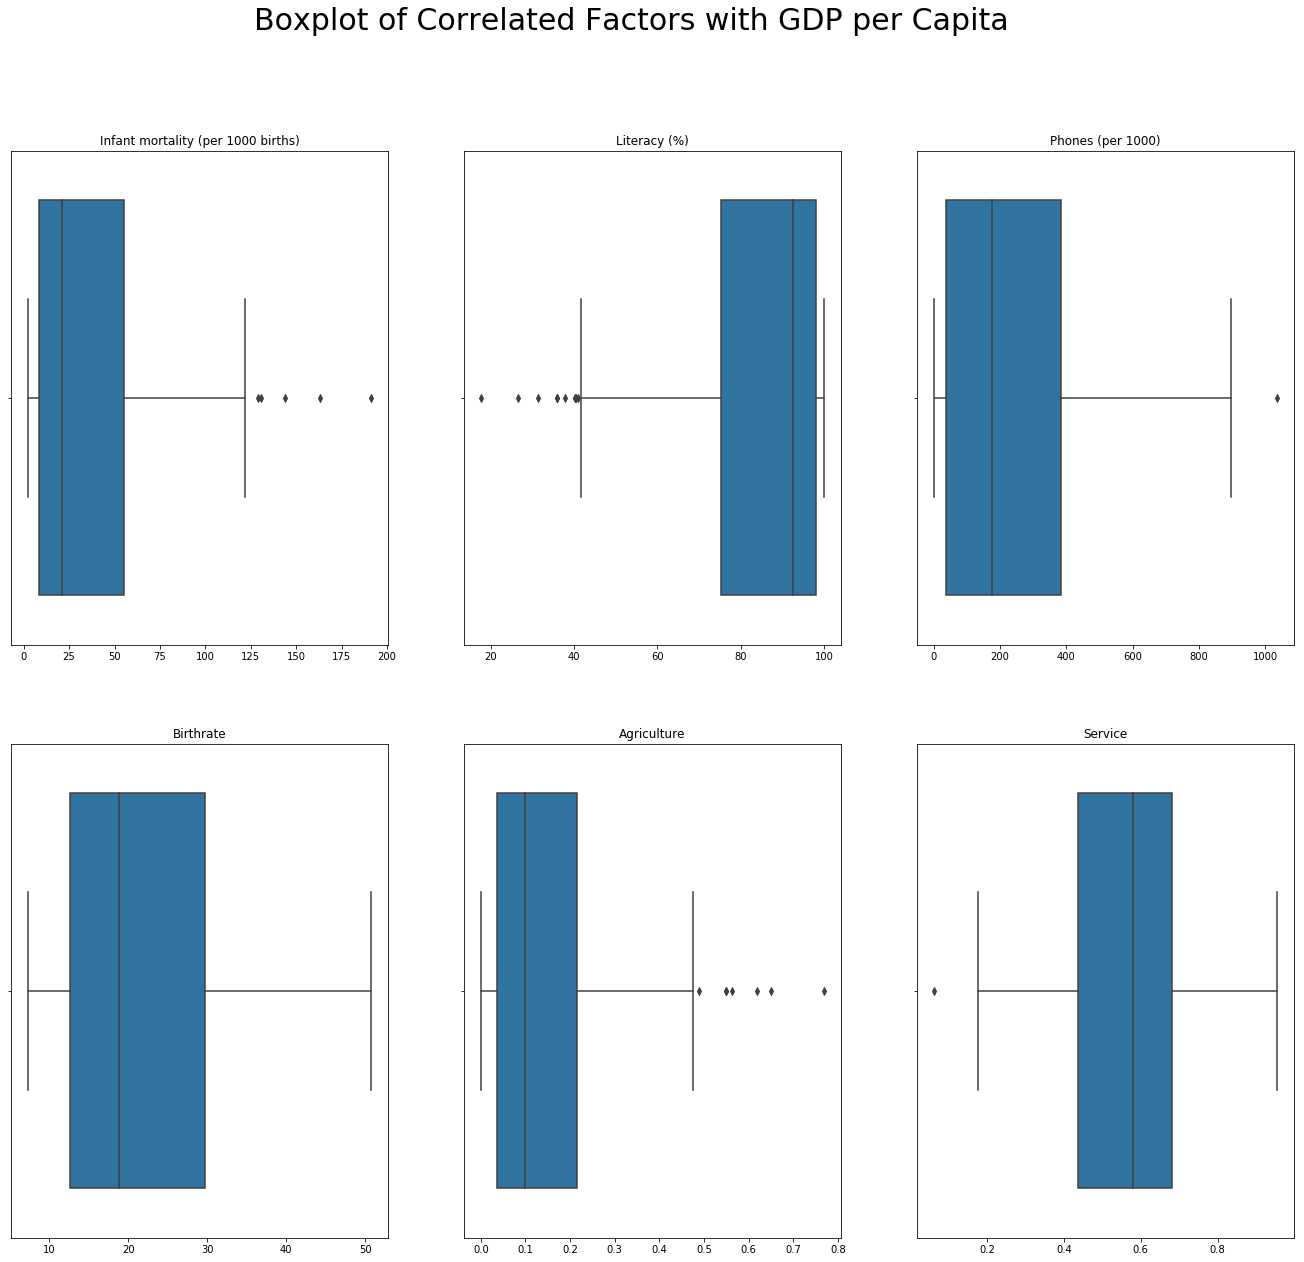

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(23,20))
plt.subplots_adjust(hspace=0.2)

z = pd.Series()
for col in df.columns.values[2:]:
     if ((col!='Deathrate')&(col!='Net migration')&(col!='Industry')&(col!='GDP ($ per capita)')&(col!='Area (sq. mi.)')&(col!='Population')&(col!='Other (%)')&(col!='Crops (%)')&(col!='Arable (%)')&(col!='Climate')&(col!='Coastline (coast/area ratio)') &(col!='Pop. Density (per sq. mi.)')):
            
        colums=np.array(df[col])
        z[col]=colums

for i in range(2):
    for j in range(3):
        x=z[i*3+j]
        y=z.index[i*3+j]
        
        sns.boxplot(x,ax=axes[i,j])
        title=str(y)
        axes[i,j].set_title(title)
        
fig.suptitle('Boxplot of Correlated Factors with GDP per Capita',fontsize=30)                      
plt.show()

# <p style="text-align: center;">Linear Regression(Data Training and Modeling)<p>
[Reference Link 3](#3)
    
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable (Factors), and the other is considered to be a dependent variable (GDP). Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data. Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data. 
#### RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in forecasting and regression analysis to verify experimental results.

#### MSLE
The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. MSLE stands for Mean Squared Log Error.

In [24]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720


### Label Encoder
From the above dataset we can see that the Region has a value that is not numeric, so it is not possible to run Linear Regression Analysis on this data. So we use Label Encoder to transform this data of Region to a Region Label. This label will assign a numeric value to all the Region Entries.

In [25]:
LE = LabelEncoder()
df['Regional_label'] = LE.fit_transform(df['Region'])
df1 = df[['Region','Regional_label']]
df1.head(5)

,Region,Regional_label
0,ASIA (EX. NEAR EAST),0
1,EASTERN EUROPE,3
2,NORTHERN AFRICA,6
3,OCEANIA,8
4,WESTERN EUROPE,10


### Multiple Linear Regression 
Multiple linear regression (MLR) is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the relationship between the explanatory and response variables.

In [26]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Regional_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [27]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('Root Mean Squared Error for Training Data is:', '%.2f' %rmse_train,'\t\tMean Squared Log Error for Training Data is:', '%.2f' %msle_train)
print('Root Mean Squared Error for Test Data is:', '%.2f' %rmse_test,'\t\tMean Squared Log Error for Test Data is:', '%.2f' %msle_test)


Root Mean Squared Error for Training Data is: 4197.36 		Mean Squared Log Error for Training Data is: 5.81
Root Mean Squared Error for Test Data is: 14763.28 		Mean Squared Log Error for Test Data is: 4.30


### Simple Linear Regression

Simple Linear Regression Analysis The simplest form of a regression analysis uses on dependent variable and one independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.

In [28]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['Phones (per 1000)']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

Root Mean Squared Error for Training Data is: 5551.53 		Mean Squared Log Error for Training Data is: 0.35
Root Mean Squared Error for Test Data is: 5538.01 		Mean Squared Log Error for Test Data is: 0.41


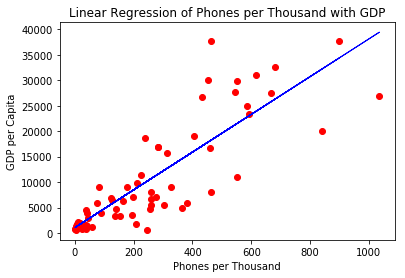

In [29]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('Root Mean Squared Error for Training Data is:', '%.2f' %rmse_train,'\t\tMean Squared Log Error for Training Data is:', '%.2f' %msle_train)
print('Root Mean Squared Error for Test Data is:', '%.2f' %rmse_test,'\t\tMean Squared Log Error for Test Data is:', '%.2f' %msle_test)

plt.scatter(test_X, test_Y,  color='red')
plt.plot(test_X, test_pred_Y, color='blue', linewidth=1)
plt.title('Linear Regression of Phones per Thousand with GDP')
plt.xlabel('Phones per Thousand')
plt.ylabel('GDP per Capita')
plt.xticks()
plt.yticks()

plt.show()

# <p style="text-align: center;">Total GDP<p>
    
GDP, which stands for Gross Domestic Product, is a measure describing the value of a country's economy. GDP takes into account all of the goods produced and services made available in a country over a specific period of time. Often, GDP is obtained quarterly and annually. GDP is a number that will ultimately indicate the overall economic health of the country.



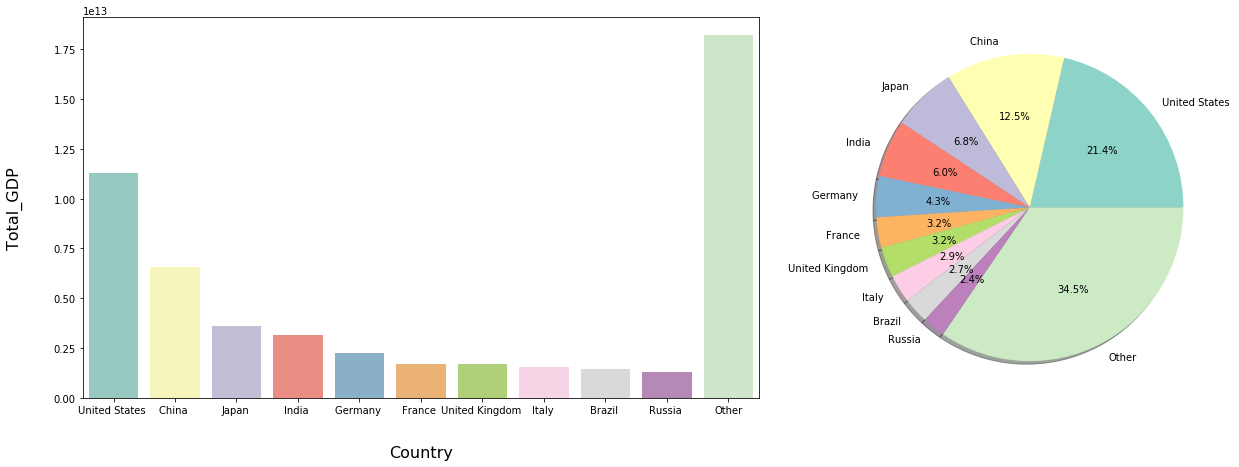

In [30]:
df['Total_GDP ($)'] = df['GDP ($ per capita)'] * df['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = df.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[df['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7), gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country', y='Total_GDP ($)', data=gdps, ax=axes[0], palette='Set3')
axes[0].set_xlabel('Country', labelpad=30, fontsize=16)
axes[0].set_ylabel('Total_GDP', labelpad=30, fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].axis('equal')
plt.show()

### Ranking of Countries according to the total GDP vs GDP per Capita

As we can see that countries like India and China which have low GDP per Capita because of their high population, jump up when it comes to calculating Total GDP.

In [31]:
Rank1 = df[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = df[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('rank of total GDP - rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

rank of total GDP - rank of GDP per capita:


Country
United States        1
China              118
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

### Correlation of Total GDP with all the factors

In [32]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Regional_label,Total_GDP ($)
Population,1.000000,0.469985,-0.028190,-0.068199,0.000122,0.024488,-0.038915,-0.051610,-0.029235,0.188337,-0.059617,-0.121118,-0.024329,-0.044151,-0.025974,0.004867,0.105732,-0.087356,-0.211694,0.639528
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047537,-0.005120,0.072460,0.025954,0.055026,-0.079270,-0.142234,0.137956,0.031986,-0.064822,0.042418,-0.048821,0.127401,-0.057227,-0.083430,0.556396
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178088,-0.142741,0.196063,0.098487,0.280818,-0.080857,-0.032460,0.082066,0.061828,-0.157909,-0.067910,-0.110235,-0.116734,0.229223,-0.069589,-0.028487
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.133947,-0.138223,0.049561,0.133112,0.153204,-0.120760,0.338889,-0.078312,-0.006490,-0.074021,-0.162705,-0.036301,-0.214819,0.210201,0.093964,-0.065211
Net migration,0.000122,0.047537,0.178088,-0.133947,1.000000,-0.024876,0.382029,-0.015620,0.239160,-0.059334,-0.344337,0.225740,0.027798,-0.064947,0.033575,-0.107105,-0.019156,0.110103,0.069365,0.054632
Infant mortality (per 1000 births),0.024488,-0.005120,-0.142741,-0.138223,-0.024876,1.000000,-0.595432,-0.758702,-0.666699,-0.113607,-0.070197,0.128063,-0.373921,0.844442,0.655891,0.706734,0.028859,-0.640007,0.144803,-0.122076
GDP ($ per capita),-0.038915,0.072460,0.196063,0.049561,0.382029,-0.595432,1.000000,0.508839,0.832364,0.023937,-0.218093,0.093737,0.361704,-0.643199,-0.196322,-0.585987,-0.034993,0.553994,0.188199,0.247920
Literacy (%),-0.051610,0.025954,0.098487,0.133112,-0.015620,-0.758702,0.508839,1.000000,0.587440,0.085269,0.038372,-0.088522,0.425807,-0.776946,-0.376756,-0.594062,0.019528,0.505618,-0.176228,0.099417
Phones (per 1000),-0.029235,0.055026,0.280818,0.153204,0.239160,-0.666699,0.832364,0.587440,1.000000,0.068853,-0.150700,0.022293,0.436692,-0.721099,-0.253033,-0.599405,-0.158178,0.670933,0.119488,0.233484
Arable (%),0.188337,-0.079270,-0.080857,-0.120760,-0.059334,-0.113607,0.023937,0.085269,0.068853,1.000000,0.094614,-0.856770,0.377806,-0.195100,0.060153,-0.023227,-0.048444,0.066550,-0.142107,0.129928


### Heatmap Representation of the same

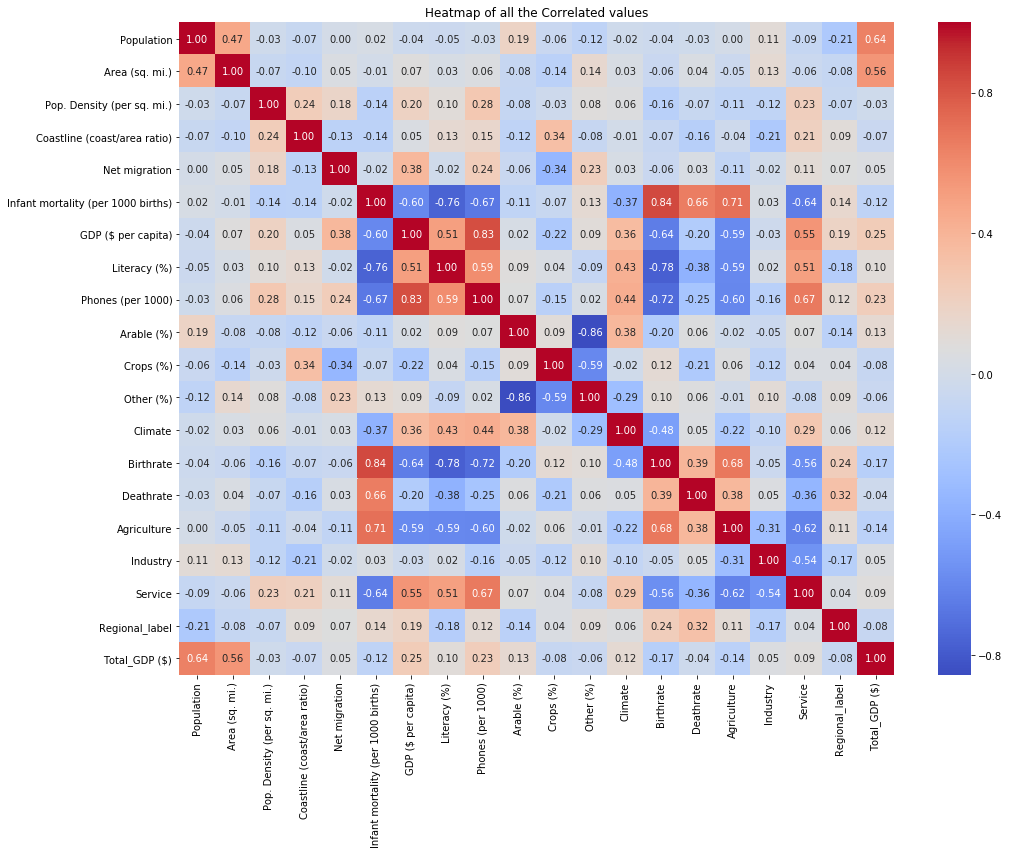

In [33]:
plt.figure(figsize=(16,12))
ax=plt.axes()
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the Correlated values')
plt.show()

In [34]:
# choose attributes which shows relation
x = df[['Total_GDP ($)','Population','Area (sq. mi.)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Agriculture']]

### Heatmap of Highly correlated values of Total GDP and GDP per Capita

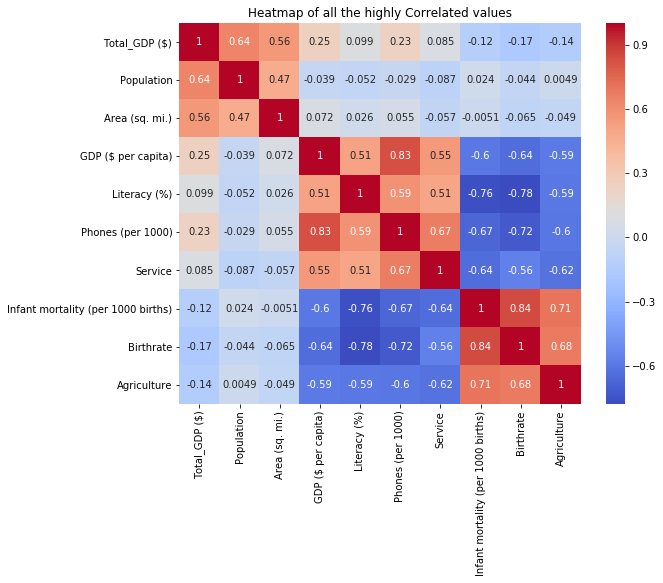

In [35]:
# show corr of the same
plt.figure(figsize=(9,7))
ax=plt.axes()
sns.heatmap(x.corr(), annot=True, cmap='coolwarm',ax=ax)
ax.set_title('Heatmap of all the highly Correlated values')
plt.show()

# <p style="text-align: center;">Conclusion<p>
    
1. Given Dataset is rightly skewed and hence therefore it's measure of central tendency is median.
2. GDP per capita is highly correlated with phones, services ,literacy rate(positively correlated) and infant mortality rate, agriculture ,birthrate (negatively correlated).
3. On being grouped region wise, GDP per capita is positively correlated with phones and services. As in the region where people tend to buy more phones those regions tend to have more GDP per capita and as for services , more the services more is the GDP per capita.
4. For highly correlated factors , the density distribution is mostly skewed. 
5. Climate has no effect on GDP per capita.
6. For multiple linear regression, we conclude that RMSE(test)=-- and MSLE(test)=--,so RMSE value is low in the range (55000) is a good measure and hence tells us that model is a good predictor as in we can make theoritical claims and ##(lower value of MSE shows that whether our model is a good estimator. (As in test data fits well with line of regression or not).
7. For single linear regression (phones per 1000 vs GDP per capita), we see that both RMSE and MSE values are good measure. Phones per 1000 is a good factor that can predict GDP per capita values.
8. According to total GDP countries like India and China which have low GDP per capita (Rank 146 and Rank 118 respectively) jump to positions 4 and 2 respectively. This shows that although their total GDP is high, but their GDP per capita is low.
9. Countries with high total GDP is quite different from countries with high GDP per capita.
10. Total GDP is highly correlated with Area and Population.
11. Factors which were highly correlated with GDP per capita has almost no effect on total GDP except for Phones per 1000 , which has correlation of 0.23

# <p style="text-align: center;">Contribution<p>
As this was a learning assignment, the majority of the code has been taken from the GitHub account of the professor Nik Brown.
    
- Code by self : 25%
- Code from external Sources : 75%

# <p style="text-align: center;">Citation<p>
1. https://github.com/nikbearbrown/INFO_6105/blob/master/Assignments/Countries_of_the_World_EDA_Assignment_1.ipynb - GitHub Account of Professor 
   <a id="1"></a>
2. https://www.kaggle.com/stieranka/predicting-gdp-world-countries - Kaggle Kernel on the same dataset
   <a id="2"></a>
3. https://www.youtube.com/watch?v=E5RjzSK0fvY&t=394s - Youtube video of Linear Regression
   <a id="3"></a>

# <p style="text-align: center;">License<p>
Copyright (c) 2019 Rushabh Nisher

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.